Project: Scrape Reviews from Yelp using Python

Descritpion: 
- Scrape Reviews from Yelp for Neptune Oyster in Boston, the restaurant with the most reviews on Yelp in Boston, and perform sentiment analysis, keywords analysis, and a word cloud.  
- The initial attempt will be to scrape 5 pages, but there are a total of 594 pages of reviews available. The script will include a sleep time to ensure it adheres to Yelp's scraping policies and avoid IP blocking.

Next Steps:
- Explore the variation in sentiment and keywords analysis across different years by scraping all 594 pages of reviews.
- Expand the project to include more complicated data mining, such as scraping reviews from multiple restaurants and implementing more advanced data processing techniques. For reference, see this project on GitHub: https://github.com/kborole7/Web-Scraping-Yelp-Text-Mining-and-Sentiment-Analysis-of-Restaurant-Reviews/blob/master/web_scraping_script.ipynb.

In [19]:
import requests
from bs4 import BeautifulSoup
import numpy as np
# import pandas as pd
# import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
import time

In [47]:
URL_p1 = "https://www.yelp.com/biz/neptune-oyster-boston?start="
page = 594 #total page
def get_url_array(url,page):  
    page_str = np.arange(0,page*10,10).astype(str)
    url_array = np.char.add(np.array([url]), page_str)
    return url_array
# extract xx pages reviews
url_array = get_url_array(url = URL_p1, page = 5) # try 5 pages
url_array

array(['https://www.yelp.com/biz/neptune-oyster-boston?start=0',
       'https://www.yelp.com/biz/neptune-oyster-boston?start=10',
       'https://www.yelp.com/biz/neptune-oyster-boston?start=20',
       'https://www.yelp.com/biz/neptune-oyster-boston?start=30',
       'https://www.yelp.com/biz/neptune-oyster-boston?start=40'],
      dtype='<U64')

In [39]:
import time

store_list = []
for url in url_array:
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    time.sleep(10) # Wait for 10 second before making the next request
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    comment_inter_list=soup.find_all('p',attrs={'class':re.compile(r'comment')})
    comment_list = list(map(lambda x: x.text,comment_inter_list))
    store_list.extend(comment_list)
    # print(url,' complete')
    # print(len(store_list))

reviews = " ".join(comment for comment in store_list)
reviews = reviews.lower()

In [40]:
# Create set of stop words
stop_words = set(STOPWORDS)
stop_words.update(['restaurant', 'food', 'place','-','boston','got','one','star']) # Add custom stop words

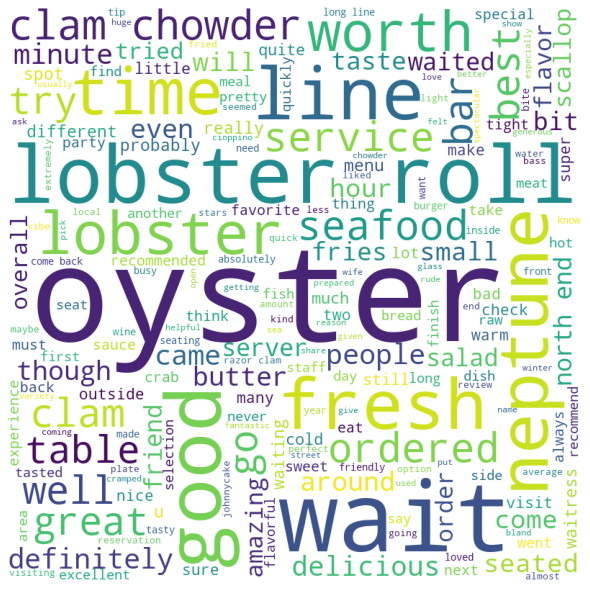

In [41]:
# plot wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words).generate(reviews)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [45]:
# Get sentiment analysis
blob = TextBlob(reviews)
sentiment = blob.sentiment.polarity

# Get keyword analysis
words = reviews.split()
# words = [word.lower() for word in words if word.lower() not in stop_words] # Remove stop words and convert to lowercase
words = [word for word in words if word not in stop_words]
word_count = Counter(words)
top_words = word_count.most_common(10)

# Print results
print(f'Sentiment: {sentiment:.2f}')
print('Top Words:')
for word in top_words:
    print(f'{word[0]}: {word[1]}')

Sentiment: 0.21
Top Words:
lobster: 77
oysters: 60
wait: 37
line: 34
roll: 34
fresh: 33
clam: 29
neptune: 29
good: 26
worth: 23
